In [60]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.ndimage.morphology import distance_transform_edt 


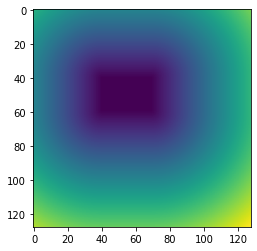

In [78]:
example = np.zeros((128, 128))
example[40:60, 40:70] = 255
plt.imshow(distance_transform_edt(np.abs(255 - example)))
plt.show()
ex = torch.from_numpy(distance_transform_edt(example)).float()
ex2 = torch.from_numpy(distance_transform_edt(np.abs(255 - example))).float()
masks = torch.nn.Conv2d(1, 4, kernel_size=3, bias=False).float()
weights = torch.tensor(
    [
        [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],
        [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],
        [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
        [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
    ]
    ).unsqueeze(1).float()
masks.weight = torch.nn.Parameter(weights)

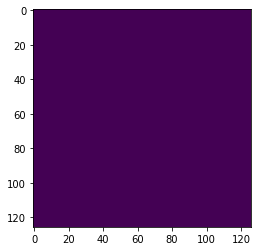

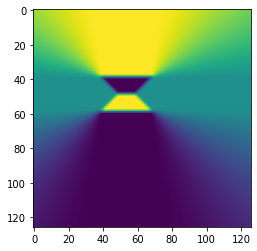

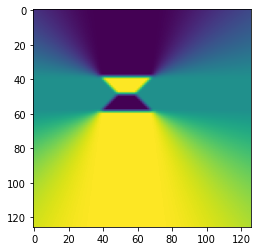

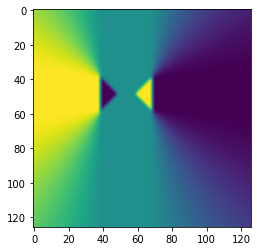

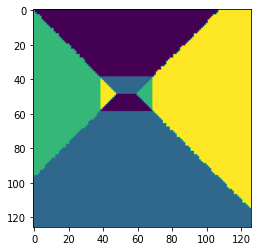

In [80]:
output = masks(ex.unsqueeze(0).unsqueeze(1))
output2 = masks(ex2.unsqueeze(0).unsqueeze(1))
output = torch.cat([torch.zeros(output.shape[0], 1, output.shape[2], output.shape[3], device=output.device) + 0.1, output + output2], dim=1)
output2 = torch.cat([torch.zeros(output.shape[0], 1, output.shape[2], output.shape[3], device=output.device) + 0.1, output2], dim=1)
for idx in range(4):
    plt.imshow(output[0, idx, :, :].detach().numpy())
    plt.show()
map_ = torch.argmax(output[0, :, :, :], dim=0).detach().numpy()
map_2 = torch.argmax(output2[0, :, :, :], dim=0).detach().numpy()

plt.imshow(map_)
plt.show()

In [58]:
map_[45, 35:45]

array([0, 0, 0, 4, 4, 0, 0, 0, 0, 0])